# Issue type classification

## Dataset

In [ ]:
### Data Collection
!wget https://tickettagger.blob.core.windows.net/datasets/dataset-labels-top3-30k-real.txt

--2022-05-27 23:54:49--  https://tickettagger.blob.core.windows.net/datasets/dataset-labels-top3-30k-real.txt
Resolving tickettagger.blob.core.windows.net (tickettagger.blob.core.windows.net)... 52.239.251.68
Connecting to tickettagger.blob.core.windows.net (tickettagger.blob.core.windows.net)|52.239.251.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22598414 (22M) [text/plain]
Saving to: ‘dataset-labels-top3-30k-real.txt.2’

dataset-labels-top3 100%[===================>]  21.55M  44.8MB/s    in 0.5s    

2022-05-27 23:54:49 (44.8 MB/s) - ‘dataset-labels-top3-30k-real.txt.2’ saved [22598414/22598414]



In [ ]:
# Load Dataset
df = pd.read_csv("dataset-labels-top3-30k-real.txt",header=None)

In [ ]:
df.head()

,0
0,__label__enhancement Exception handling # Desc...
1,__label__enhancement Subpasses in MSL and HLSL...
2,__label__enhancement Collect new discovered no...
3,__label__enhancement Lock property : several p...
4,__label__bug Return default location type labe...


In [ ]:
df_new = df[0].str.split(r'(__label__enhancement)|(__label__bug)|(__label__question)',expand=True)

In [ ]:
df_new.head()

,0,1,2,3,4
0,,__label__enhancement,None,None,Exception handling # Description The methods...
1,,__label__enhancement,None,None,Subpasses in MSL and HLSL Sorry for all the i...
2,,__label__enhancement,None,None,Collect new discovered nodes Collect new adde...
3,,__label__enhancement,None,None,Lock property : several properties at once
4,,None,__label__bug,None,Return default location type label if custom ...


In [ ]:
enh_df = df_new[df_new[1] == '__label__enhancement'][[1,4]]

In [ ]:
enh_df.head()

,1,4
0,__label__enhancement,Exception handling # Description The methods...
1,__label__enhancement,Subpasses in MSL and HLSL Sorry for all the i...
2,__label__enhancement,Collect new discovered nodes Collect new adde...
3,__label__enhancement,Lock property : several properties at once
5,__label__enhancement,Randomize: remove sliders


In [ ]:
bug_df = df_new[df_new[2] == '__label__bug'][[2,4]]
question_df = df_new[df_new[3] == '__label__question'][[3,4]]

In [ ]:
bug_df.head()

,2,4
4,__label__bug,Return default location type label if custom ...
6,__label__bug,[TW-417] JSON export has extra commas (on 2.1...
7,__label__bug,System.AccessViolationException: my program t...
8,__label__bug,Topic mining fails with UnicodeEncodeError ``...
10,__label__bug,Preflight and non-batching requests throw an ...


In [ ]:
question_df.head()

,3,4
12,__label__question,Avoiding the default NotEmpty::IS_EMPTY valid...
30,__label__question,Is there a way to authenticate the video stre...
68,__label__question,"Disable rotation of the plugin Hi, I disable..."
112,__label__question,Question: Rule and Strategy over certain time...
124,__label__question,Is the .postcssrc file still necessary?


In [ ]:
enh_df.columns = ['label','description']
bug_df.columns = ['label','description']
question_df.columns = ['label','description']

In [ ]:
# Concat Dataframes
df = pd.concat([enh_df,bug_df,question_df])

In [ ]:
df.head()

,label,description
0,__label__enhancement,Exception handling # Description The methods...
1,__label__enhancement,Subpasses in MSL and HLSL Sorry for all the i...
2,__label__enhancement,Collect new discovered nodes Collect new adde...
3,__label__enhancement,Lock property : several properties at once
5,__label__enhancement,Randomize: remove sliders


In [ ]:
df['label'] = df['label'].str.replace('__label__','')

In [ ]:
df

,label,description
0,enhancement,Exception handling # Description The methods...
1,enhancement,Subpasses in MSL and HLSL Sorry for all the i...
2,enhancement,Collect new discovered nodes Collect new adde...
3,enhancement,Lock property : several properties at once
5,enhancement,Randomize: remove sliders
...,...,...
29940,question,小白问题：监控页面配置了密码访问，如何通过http获取View JSON。 如题
29942,question,Possible to support 1.0.0-* and 2.0.0-rc2-079...
29950,question,Input/output error when getattr() called when...
29983,question,No example ? I don't see any application of ...


In [ ]:
df.loc[df['label']!="bug",'label'] = 0
df.loc[df['label']=="bug",'label'] = 1
#.at['label'] = 0
#df[df['label']=="bug"].at['label'] = 1

df['label'].unique()

array([0, 1], dtype=object)

In [ ]:
# norm_df, idx = preprocess(df['description'])

100%|██████████| 30000/30000 [00:14<00:00, 2053.57it/s]

29475


In [ ]:
# len(norm_df)

29475

In [ ]:
# docs = norm_df

In [ ]:
# from gensim.models import Word2Vec

# size = 200 #100
# window = 5
# min_count = 0

# model_cbow = Word2Vec(docs, sg=1, size = size, window = window, min_count = min_count)

In [ ]:
# avg_norm_docs = []
# for i in range(len(docs)):
#   # try:
#   word = docs[i]
#   #   model.wv[word]
#   # except:
#   #   word = "UKN"
#   #   pass
#   # if sentences[i] in model.wv:
#   #   word = sentences[i]
#   # else:
#   #   word = ""
#   # print(word)
#   avg_norm_docs.append(np.mean(model_cbow.wv[word], axis=0))

In [ ]:
# len(avg_norm_docs)

29475

In [ ]:
# enc_docs = pd.DataFrame(avg_norm_docs, index = idx) 
# docs_nodes = enc_docs
# enc_docs

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.203472,-0.178952,0.218310,0.358175,0.075413,-0.073877,0.164064,0.104889,-0.056116,-0.288780,...,0.035471,0.245461,-0.167846,0.007244,0.115038,0.109494,0.297091,-0.166986,0.051715,-0.145576
1,0.158641,-0.149941,0.178679,0.347281,0.156816,-0.019492,0.239741,0.147570,-0.036692,-0.246080,...,0.062105,0.194898,-0.119704,0.016554,0.090977,0.191622,0.274605,-0.063560,0.095306,-0.078912
2,0.181225,-0.079827,0.316266,0.300753,0.251111,-0.086277,0.290016,0.126079,0.011091,-0.377395,...,0.131507,0.230696,-0.108084,-0.101604,0.119205,0.167234,0.315173,-0.106437,0.029242,-0.095344
3,0.203108,-0.098182,0.233683,0.462481,0.025120,0.050510,0.273105,0.239682,-0.005977,-0.386989,...,0.089814,0.252957,-0.154502,-0.009902,0.232978,0.290470,0.361624,-0.119155,0.363355,0.006502
5,0.028709,-0.082824,0.154153,0.263129,-0.001011,-0.003787,0.329224,0.034255,-0.002917,-0.346779,...,0.324802,0.280043,-0.186245,0.022841,0.218679,0.363860,0.182446,-0.132631,0.169722,-0.219626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29940,0.241357,-0.571036,0.275035,0.228441,0.228006,-0.074570,0.099177,0.266776,-0.086974,-0.363069,...,-0.076360,0.061503,0.126268,0.019797,0.316921,0.033696,0.034383,0.036825,0.010330,-0.110146
29942,0.091422,-0.219390,0.204732,0.366721,0.117381,-0.137719,0.173707,0.275620,-0.032066,-0.353373,...,-0.044262,0.150368,-0.147011,-0.039840,0.014771,0.268767,0.332936,-0.093855,0.085176,-0.192584
29950,0.148648,-0.189264,0.213763,0.458429,0.286778,-0.047222,0.344933,0.170673,-0.017819,-0.271192,...,0.058611,0.225446,-0.148735,-0.059094,0.197114,0.207296,0.349995,-0.012935,0.102263,-0.065386
29983,0.106990,-0.147122,0.278659,0.384465,0.090050,-0.035483,0.206543,0.218835,0.058073,-0.170248,...,-0.029788,0.296179,-0.137729,0.013128,0.108300,0.287097,0.259630,-0.048594,0.050467,-0.196382


In [ ]:
# X = enc_docs
# y = df.loc[enc_docs.index, 'label']

In [ ]:
# X.shape, y.shape

((29475, 200), (29475,))

In [ ]:
# y = y.astype(bool)

In [ ]:
#Split Dataset
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify = y)

In [ ]:
# Load ML Pkgs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

In [ ]:
#clf = DecisionTreeClassifier() 
#clf = RandomForestClassifier() 
clf = SVC(kernel = 'poly')
clf.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
!pip install xgboost -q

In [ ]:
from xgboost import XGBClassifier 
#fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

In [ ]:
model.score(x_test, y_test)

0.7311711222689646

In [ ]:
clf.score(x_test, y_test)

0.7355136382141403

In [ ]:
clf.score(x_test, y_test)

0.7233003121183336

In [ ]:
clf.score(x_test, y_test)

0.715700909214276

In [ ]:
clf.score(x_test, y_test)

0.7546478490975709

#### NN + Embedding layer

In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd 
tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt
import os

PATH = "/content/drive/MyDrive/TOM" 


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
# lines, y= pd.read_csv(os.path.join(PATH, "issues", "processedtext.csv"))

In [ ]:
# pd.concat([lines, y], axis = 1)

In [ ]:
#dd = pd.DataFrame({"issue_text" : df['description'] , "label" : df['label']})

In [ ]:
#dd.to_csv(os.path.join(PATH, "issues", "processedtext.csv"), index = None)

In [ ]:
# dd

In [ ]:
dd = pd.read_csv(os.path.join(PATH, "issues", "processedtext.csv")) 
lines = dd['issue_text']
y = dd['label']

In [ ]:
#lines = [" ".join(s) for s in docs]
#Split Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(lines,y,test_size=0.25,random_state=42, stratify = y)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b' Ajax search failing when using PostgreSQL Our Laravel app is using PostgreSQL v9.6 for it\'s database because of our need of geo functions.  When trying to use the search feature with ajax tables we are getting the following error    ```  Next Illuminate\\Database\\QueryException: SQLSTATE[42883]: Undefined function: 7 ERROR:  operator does not exist: integer ~~ unknown  LINE 1: ... or "email" like $3 or "password" like $4 or "id" like $5) a...                                                               ^  HINT:  No operator matches the given name and argument type(s). You might need to add explicit type casts. (SQL: select count(*) as aggregate from "users" where ("first_name" like %marc% or "last_name" like %marc% or "email" like %marc% or "password" like %marc% or "id" like %marc%) and "users"."deleted_at" is null) in <SNIP>/vendor/laravel/framework/src/Illuminate/Database/Connection.php:770  ```    In https://github.com/Laravel-Backpack/CRUD/blob/master/src/app/Http/Con

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 1000 
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8,activation = "relu"), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# history = model.fit(train_dataset, epochs=10,
#                     validation_data=test_dataset,
#                     validation_steps=30)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 3, restore_best_weights = True)

history2 = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    # validation_steps=30, 
                     callbacks = [es])

Epoch 1/10
352/352 [==============================] - 39s 100ms/step - loss: 0.6409 - accuracy: 0.6572 - val_loss: 0.5304 - val_accuracy: 0.7768
Epoch 2/10
352/352 [==============================] - 33s 93ms/step - loss: 0.4969 - accuracy: 0.7815 - val_loss: 0.4799 - val_accuracy: 0.7908
Epoch 3/10
352/352 [==============================] - 33s 93ms/step - loss: 0.4488 - accuracy: 0.8048 - val_loss: 0.4519 - val_accuracy: 0.8048
Epoch 4/10
352/352 [==============================] - 33s 93ms/step - loss: 0.4280 - accuracy: 0.8134 - val_loss: 0.4375 - val_accuracy: 0.8053
Epoch 5/10
352/352 [==============================] - 34s 97ms/step - loss: 0.4186 - accuracy: 0.8166 - val_loss: 0.4333 - val_accuracy: 0.8088
Epoch 6/10
352/352 [==============================] - 33s 93ms/step - loss: 0.4100 - accuracy: 0.8190 - val_loss: 0.4305 - val_accuracy: 0.8107
Epoch 7/10
352/352 [==============================] - 32s 92ms/step - loss: 0.4071 - accuracy: 0.8184 - val_loss: 0.4300 - val_accuracy

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 3, restore_best_weights = True)

history3 = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    # validation_steps=30, 
                     callbacks = [es])

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

118/118 [==============================] - 8s 67ms/step - loss: 0.4283 - accuracy: 0.8101
Test Loss: 0.428317666053772
Test Accuracy: 0.8101333379745483


In [ ]:
targets = y_test
#targets

In [ ]:
predicted = model.predict(test_dataset) >0.5

from sklearn.metrics import classification_report 
print(classification_report(targets, predicted))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3678
           1       0.81      0.82      0.81      3822

    accuracy                           0.81      7500
   macro avg       0.81      0.81      0.81      7500
weighted avg       0.81      0.81      0.81      7500



In [ ]:
model.predict(test_dataset)

array([[-3.3541517 ],
       [-4.0179954 ],
       [-0.26680773],
       ...,
       [-0.7316054 ],
       [-0.938584  ],
       [ 2.7598357 ]], dtype=float32)

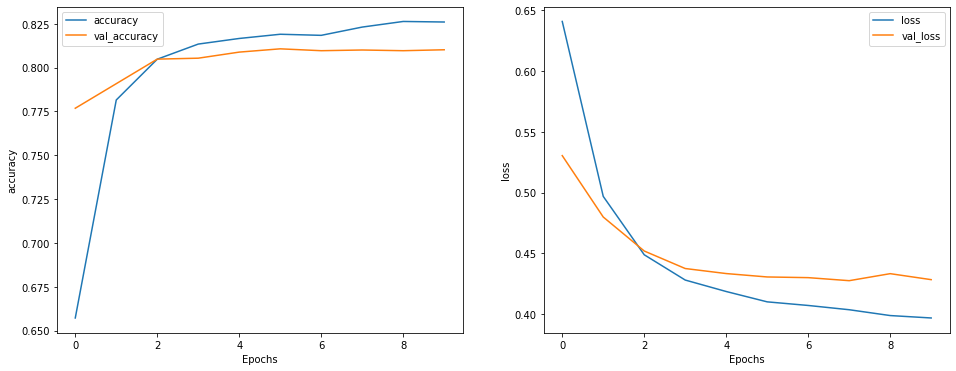

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history2, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history2, 'loss')

Save the model

In [ ]:
model.save(os.path.join(PATH, "models", "clf_final"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TOM/models/clf_final/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/TOM/models/clf_final/assets
